**SALES PREDICTION USING PYTHON**

Project Name -Sales Prediction Using Python

Project Type - Regression

Industry - Oasis Infobyte

Contribution - Individual

Member Name - MANISHA S

Task - 5

**PROJECT SUMMARY**

**OBJECTIVE**

In this data science project, the goal is to predict future sales for product and service-based businesses. The prediction factors include advertising expenditures, audience segmentation, and advertising platforms.

**PROBLEM STATEMENT**

The problem at hand involves predicting future sales for product and service-based businesses. With the dynamic nature of the market, businesses need to anticipate sales figures based on various factors, including advertising expenses, audience targeting, and the choice of advertising platforms.

IMPORT LIBRARIES

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

DATASET LOADING

In [2]:
import pandas as pd
df = pd.read_csv("/content/Advertising.csv")

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  5


In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


DUPLICATE VALUES

In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

* The Advertising dataset consists of Sales of TV, Radio and Newspaper.
* There are 200 rows and 5 columns provided in the data.
* No duplicate values exist in the dataset.
* Null values not exist in the dataset.

UNDERSTANDING THE VARIABLES

In [8]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


CHECKING UNIQUE VALUES

In [10]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


DATA WRANGLING

In [11]:
# Removing the 'Unnamed: 0' column as it's no longer needed
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
# New updated DataFrame
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
# Defining dependent variable
dependent_variable = ['Sales']

DATA VISUALIZATION

Numerical Variable vs Target Variable

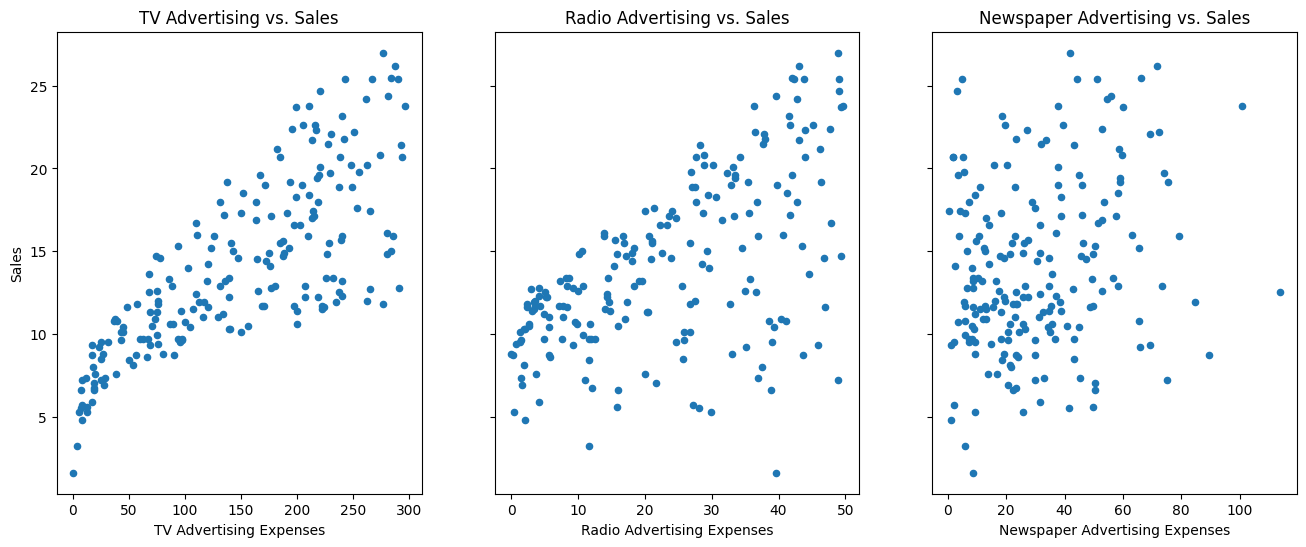

In [14]:
#Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

 Correlation Heatmap

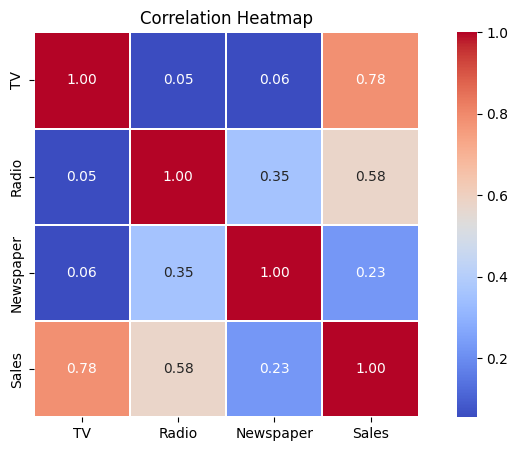

In [ ]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

PAIR PLOT

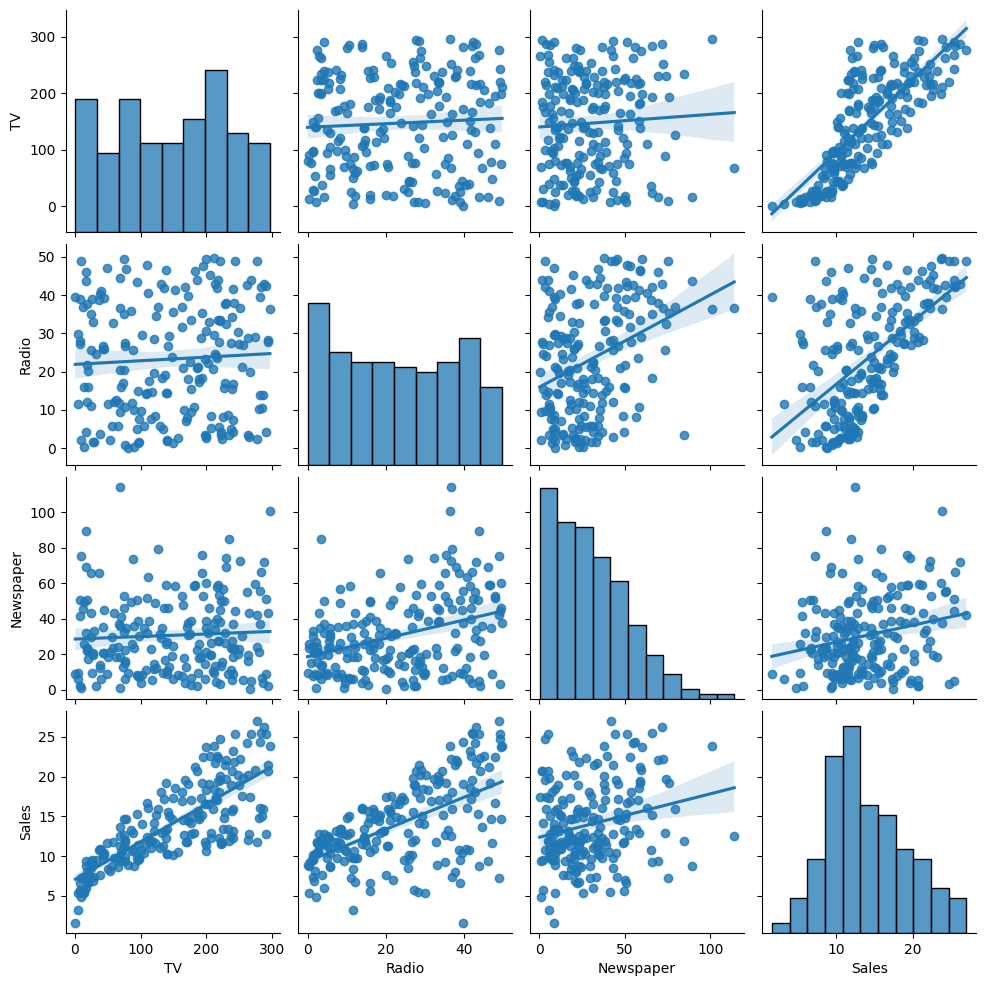

In [ ]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

DATA PREPROCESSING

In [ ]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

In [ ]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [ ]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [ ]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [ ]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [ ]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


DATA TRANSFORMATION

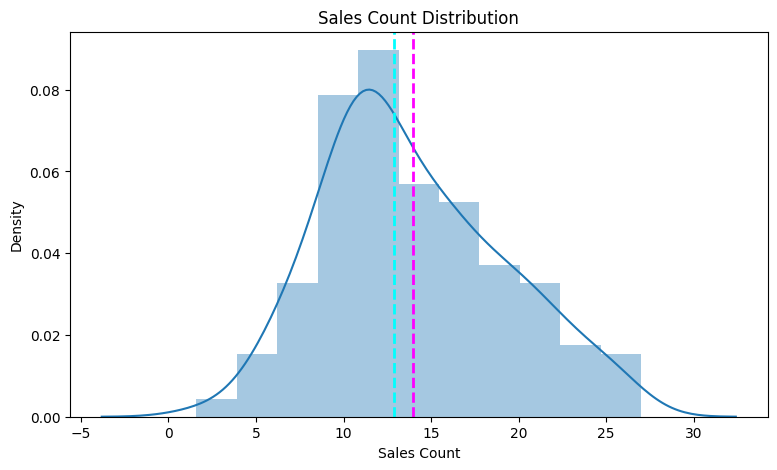

In [ ]:
# Transform the data
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [ ]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [ ]:
features

['TV', 'Radio', 'Newspaper']

DATA SCALING

In [ ]:
features = [i for i in df.columns if i not in ['Sales']]

In [ ]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

DATA SPLITTING

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Length: 109, dtype: int64

**ML MODEL IMPLEMENTATION**

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

**LINEAR REGRESSION**

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


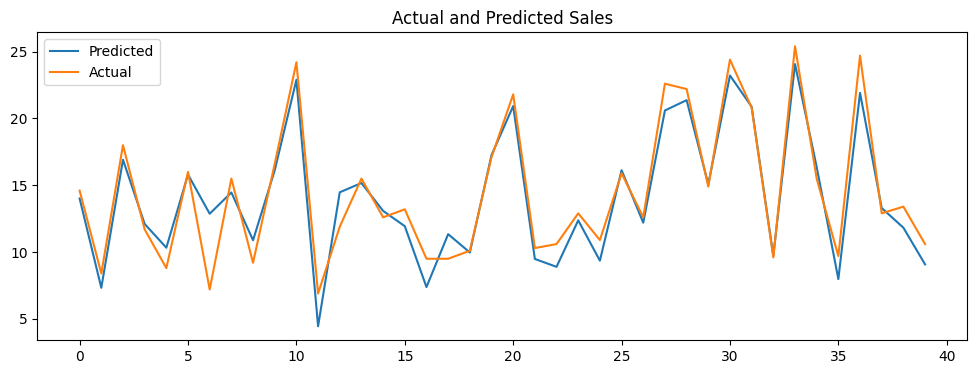

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [ ]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [ ]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


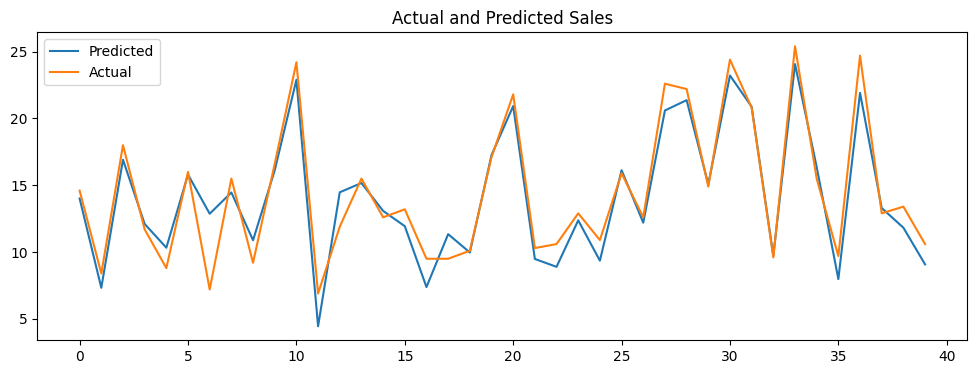

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


**CONCLUSION**

In the dynamic landscape of product and service-based businesses, the ability to forecast sales is paramount. This project, undertaken during the data science internship at Oasis Infobyte, delved into the realm of sales prediction using machine learning with Python. Let's encapsulate the key findings:

**Insights and Observations:**

Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.

Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.

The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.

The linear regression model emerged as the preferred choice, achieving an impressive 89% training accuracy and 90% testing accuracy.

**Key Takeaways:**

Understanding the correlation between advertising expenses and sales aids in strategic decision-making.

The selected model demonstrates robust predictive capabilities, laying the groundwork for effective sales planning.

The R2 score provides a reliable indicator of the model's accuracy in forecasting sales trends.

This project not only addresses the nuances of sales prediction but also highlights the pivotal role of data science in optimizing business strategies. The findings contribute to informed decision-making, offering valuable insights for future sales initiatives.

